Is mining profitable?

The cryptocurrencies from top-10 by capitalization using PoW consensus:

Bitcoin
Ethereum
(Tether?)
Bitcoin Cash
Litecoin
Bitcoin SV

Profit modeling in the simplest model: 

$$
Revenue = \frac{Hashing\ Power}{Network\ Hashrate}\cdot \frac{Block\ Reward}{Block\ Time}\cdot Coin\ Price
$$

$$
Costs = kWh\ cost\cdot W\ Consumption)
$$

$$
Net\ Profit = Revenue - Costs
$$

Profitability metric: payback time

$$
DCF = \frac{Daily\ Profit}{1-\exp({-\frac{r}{365.25}})}
$$

$$
Payback\ Time = \ln\Big(1-\frac{Device\ Price}{DCF}\Big)\cdot\frac{365.25}{r}
$$

In [0]:
import numpy as np

class PoW_currency():
  def __init__(self, Name, HashRate, BlockReward, BlockTime, CoinPrice):
    self.Name = Name
    self.HashRate, self.BlockReward, self.BlockTime, self.CoinPrice = HashRate, BlockReward, BlockTime, CoinPrice
    self.HP_Multiplier = (self.BlockReward*self.CoinPrice)/(self.HashRate*self.BlockTime)

class Hardware(PoW_currency):
  '''
  Model assumptions:
  By default, the required space is not taken into account
  The hardware does not need maintainance and does not break
  '''
  def __init__(self, Name, Currency, HashingPower, Watt_Consumption, Price, SquaredMeters=0.):
    self.Name = Name
    self.CurrencyName = Currency.Name
    self.HP_Multiplier = Currency.HP_Multiplier
    self.HP = HashingPower
    self.Watts = Watt_Consumption
    self.space = SquaredMeters
    self.Price = Price
    self.Revenue = self.HP*self.HP_Multiplier#USD per second
    
  def set_up_rig(self, Country, pool_fee=0., USD_interest_rate=0.03):
    costs = (Country.Wh_price * self.Watts + Country.SquaredMeters_RentalCosts * self.space)/3600#per second
    revenue = self.Revenue*(1.-pool_fee)
    daily_disposable_income = (revenue-costs)*(1.-Country.IncomeTax)*3600*24
    DCF = daily_disposable_income/(1.-np.exp(-1./365.25*USD_interest_rate))#discounted cash flows
    payback_time = np.inf if DCF<self.Price else np.log(1.-(self.Price/DCF))/np.log(1.-1./365.25*USD_interest_rate)
    return(daily_disposable_income, payback_time)
    
  
class country():
  '''
  Model assumptions:
  No taxes by default;
  Fixed electricity costs;
  The default space for hardware is free - which is the case for small mining farms owned by private households
  SquaredMeters_RentalCosts - in USD/day
  '''
  def __init__(self, Name, kWh_price, SquaredMeters_RentalCosts=0., IncomeTax=0.):
    self.Name = Name
    self.Wh_price = kWh_price/1000
    self.SquaredMeters_RentalCosts = SquaredMeters_RentalCosts/24#USD per day-> USD per hour
    self.IncomeTax = IncomeTax

In [5]:
BTC = PoW_currency(Name='BTC', HashRate=9.217e19, BlockReward=12.69, BlockTime=600, CoinPrice=7133)
AntMinerU3 = Hardware(Name='AntMinerU3', Currency=BTC, HashingPower=6.3e10, Watt_Consumption=63, Price=38)
Russia = country(Name='Russia', kWh_price=0.069)
print(f"Daily profit ($) and payback time are {AntMinerU3.set_up_rig(Country=Russia)}")

Daily profit ($) and payback time are (-0.09541862374481938, inf)


In [6]:
AntMinerS9 = Hardware(Name='AntMinerS9', Currency=BTC, HashingPower=14e12, Watt_Consumption=1375, Price=2400)
print(f"Daily profit ($) and payback time are {AntMinerS9.set_up_rig(Country=Russia)}")

Daily profit ($) and payback time are (-0.2971386099598574, inf)


In [22]:
from google.colab import files
files.upload()

Saving statistic_id263492_electricity_prices.xlsx to statistic_id263492_electricity_prices (2).xlsx


{'statistic_id263492_electricity_prices.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00{\x92\xc8!z\x01\x00\x00\x81\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [0]:
import pandas as pd

In [23]:
countries = pd.read_excel('statistic_id263492_electricity_prices.xlsx')
#countries = countries.append({'Country':'Russia', 'USD/kWh':0.069}, ignore_index=True)
countries

,Country,USD/kWh
0,Germany,0.330
1,Belgium,0.280
2,Italy,0.270
3,Portugal,0.260
4,Spain,0.240
5,Austria,0.230
6,United Kingdom,0.220
7,Japan,0.220
8,Sweden,0.210
9,New Zealand,0.200


In [24]:
LTC_HW = pd.read_excel('LTC_Hardware.xlsx')
LTC_HW

,Model,Hashrate,Power,Price
0,Innosilicon A6+ LTC Master,2.20 Gh/s,2100W,3000
1,Bitmain Antminer L3++,596.00 Mh/s,1050W,265


In [25]:
LTC_HW.Hashrate = LTC_HW.Hashrate.apply(lambda x: float(x.split()[0])*{'Gh/s':1e9, 'Mh/s':1e6, 'Th/s':1e12}[x.split()[1]])
LTC_HW.Power = LTC_HW.Power.apply(lambda x: float(x.split('W')[0]))
LTC_HW

,Model,Hashrate,Power,Price
0,Innosilicon A6+ LTC Master,2.200000e+09,2100.0,3000
1,Bitmain Antminer L3++,5.960000e+08,1050.0,265


In [92]:
data = []
LTC=PoW_currency(Name='LTC', HashRate=1.42e14, BlockReward=12.5, BlockTime=150, CoinPrice=39.69)
for HW in LTC_HW.values:
  device = Hardware(Name=HW[0], Currency=LTC, HashingPower=HW[1], Watt_Consumption=HW[2], Price=HW[3])
  for cntr in countries.values:
    Country = country(Name=cntr[0], kWh_price=cntr[1])
    data.append([device.Name, Country.Name, np.round(device.set_up_rig(Country=Country)[0], 2), np.round(device.set_up_rig(Country=Country)[1], 1)])
    #print(f"\nDevice: {data[-1][0]}\nCountry: {data[-1][1]}\nDaily profit: ${data[-1][2]}\nPayback time: {data[-1][3]} days\n")
data = pd.DataFrame(data=data, columns=['Device', 'Country', 'Daily profit', 'Payback time'])
data

,Device,Country,Daily profit,Payback time
0,Innosilicon A6+ LTC Master,Germany,-12.20,inf
1,Innosilicon A6+ LTC Master,Belgium,-9.68,inf
2,Innosilicon A6+ LTC Master,Italy,-9.18,inf
3,Innosilicon A6+ LTC Master,Portugal,-8.68,inf
4,Innosilicon A6+ LTC Master,Spain,-7.67,inf
5,Innosilicon A6+ LTC Master,Austria,-7.16,inf
6,Innosilicon A6+ LTC Master,United Kingdom,-6.66,inf
7,Innosilicon A6+ LTC Master,Japan,-6.66,inf
8,Innosilicon A6+ LTC Master,Sweden,-6.16,inf
9,Innosilicon A6+ LTC Master,New Zealand,-5.65,inf


In [93]:
data['USD/kWh'] = countries['USD/kWh'].values.tolist()+countries['USD/kWh'].values.tolist()
data[data['Payback time']!=np.inf]

,Device,Country,Daily profit,Payback time,USD/kWh
22,Innosilicon A6+ LTC Master,India,0.40,11881.9,0.080
23,Innosilicon A6+ LTC Master,China,0.50,8355.6,0.078
24,Innosilicon A6+ LTC Master,Argentina,3.92,789.6,0.010
25,Innosilicon A6+ LTC Master,Russia,0.95,3656.3,0.069
26,Innosilicon A6+ LTC Master,Kuwait,3.57,870.5,0.017
27,Innosilicon A6+ LTC Master,Venezuela,3.47,896.8,0.019
28,Innosilicon A6+ LTC Master,Myanmar,2.92,1075.0,0.030
54,Bitmain Antminer L3++,Argentina,0.95,282.9,0.010
56,Bitmain Antminer L3++,Kuwait,0.77,348.6,0.017
57,Bitmain Antminer L3++,Venezuela,0.72,373.4,0.019


In [34]:
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


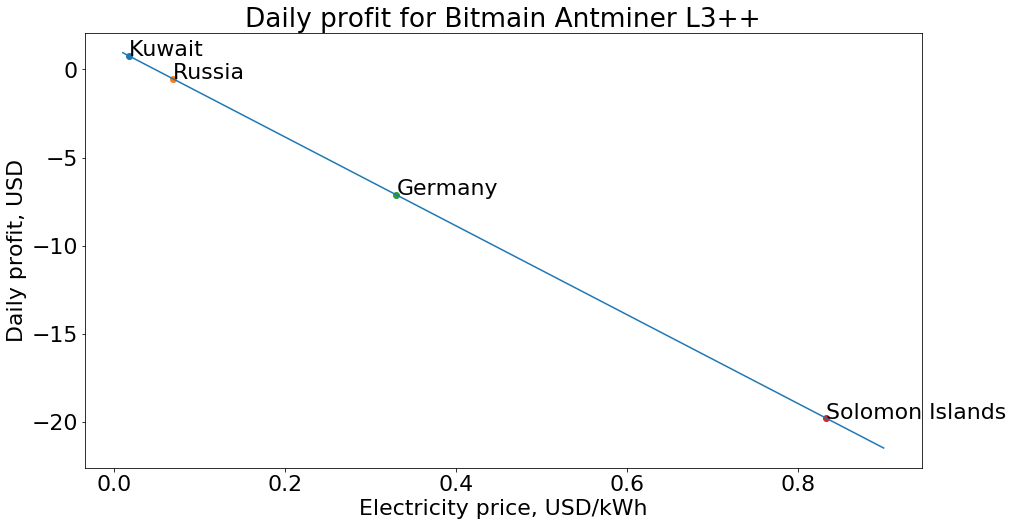

In [94]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
X = np.linspace(0.01, 0.9, 900)


CountriesVisualise = ['Kuwait', 'Russia', 'Germany', 'Solomon Islands']


plt.figure(figsize=(15, 8))
plt.plot(X, [device.set_up_rig(Country=country(Name="NoName", kWh_price=x))[0] for x in X])
for Country in CountriesVisualise:
    row = data[data['Country']==Country][data['Device']==device.Name]
    plt.annotate(xy=(row['USD/kWh'].values[0], row['Daily profit'].values[0]), s=Country)
    plt.scatter([row['USD/kWh'].values[0]], [row['Daily profit'].values[0]])
plt.ylabel('Daily profit, USD')
plt.xlabel('Electricity price, USD/kWh')
plt.title('Daily profit for '+device.Name)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


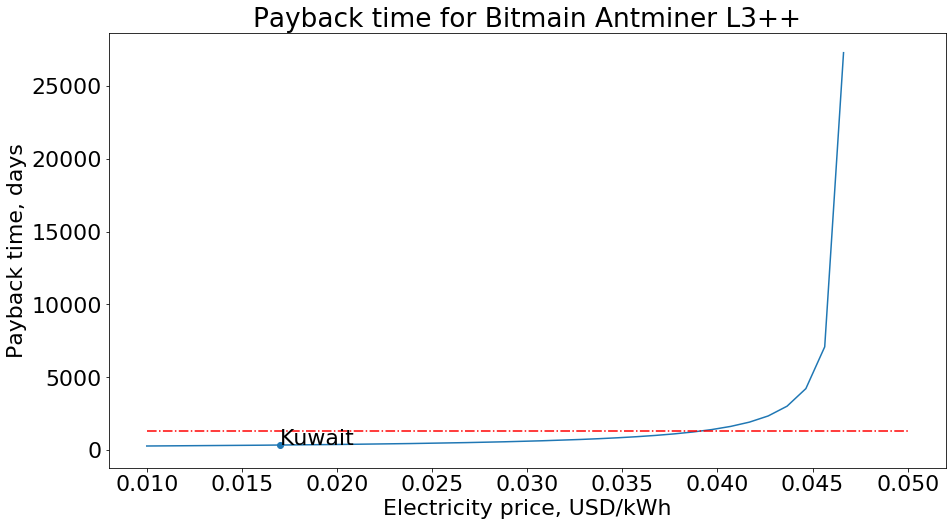

In [96]:
time_to_halving=1326
plt.figure(figsize=(15, 8))
plt.plot(X, [device.set_up_rig(Country=country(Name="NoName", kWh_price=x))[1] for x in X])
for Country in CountriesVisualise:
    row = data[data['Country']==Country][data['Device']==device.Name]
    plt.annotate(xy=(row['USD/kWh'].values[0], row['Payback time'].values[0]), s=Country)
    plt.scatter([row['USD/kWh'].values[0]],[row['Payback time'].values[0]])
plt.plot([X[0], 0.05], [time_to_halving, time_to_halving], 'r-.')
plt.ylabel('Payback time, days')
plt.xlabel('Electricity price, USD/kWh')
plt.title('Payback time for '+device.Name)
plt.show()

In [0]:
HW = LTC_HW.values[0]
device = Hardware(Name=HW[0], Currency=LTC, HashingPower=HW[1], Watt_Consumption=HW[2], Price=HW[3])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


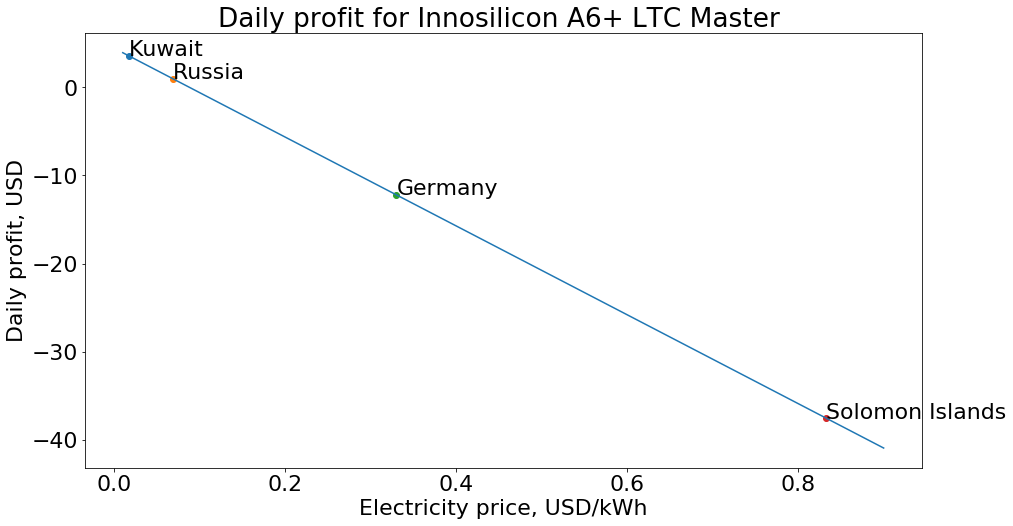

In [98]:
plt.figure(figsize=(15, 8))
plt.plot(X, [device.set_up_rig(Country=country(Name="NoName", kWh_price=x))[0] for x in X])
for Country in CountriesVisualise:
    row = data[data['Country']==Country][data['Device']==device.Name]
    plt.annotate(xy=(row['USD/kWh'].values[0], row['Daily profit'].values[0]), s=Country)
    plt.scatter([row['USD/kWh'].values[0]], [row['Daily profit'].values[0]])
plt.ylabel('Daily profit, USD')
plt.xlabel('Electricity price, USD/kWh')
plt.title('Daily profit for '+device.Name)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


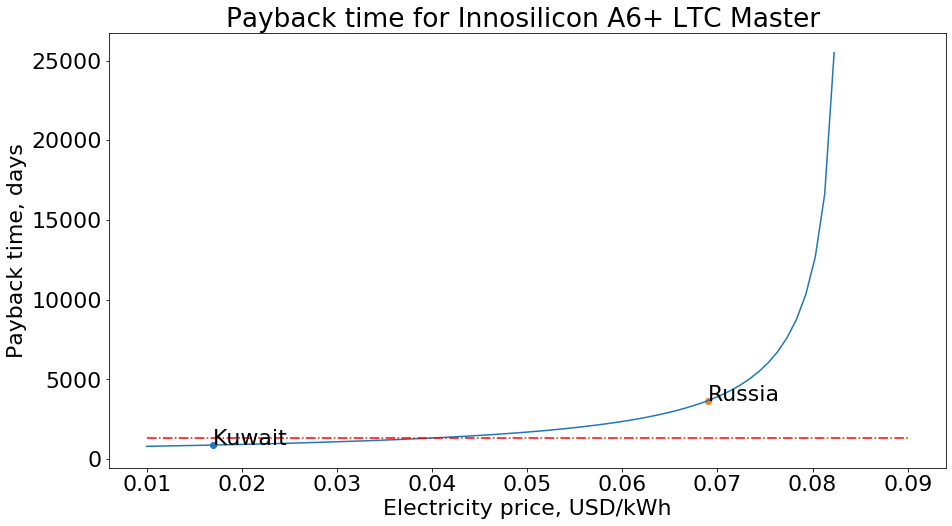

In [99]:
plt.figure(figsize=(15, 8))
plt.plot(X, [device.set_up_rig(Country=country(Name="NoName", kWh_price=x))[1] for x in X])
for Country in CountriesVisualise:
    row = data[data['Country']==Country][data['Device']==device.Name]
    plt.annotate(xy=(row['USD/kWh'].values[0], row['Payback time'].values[0]), s=Country)
    plt.scatter([row['USD/kWh'].values[0]],[row['Payback time'].values[0]])
plt.plot([X[0], 0.09], [time_to_halving, time_to_halving], 'r-.')
plt.ylabel('Payback time, days')
plt.xlabel('Electricity price, USD/kWh')
plt.title('Payback time for '+device.Name)
plt.show()